In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("credit_card_transactions.csv",
                 usecols=['trans_date_trans_time', 'cc_num','merchant', 'category','amt', 'first', 'last', 
                         'gender', 'street', 'city', 'state', 'zip','lat', 'long', 'city_pop', 
                         'job', 'dob', 'trans_num', 'unix_time','merch_lat', 'merch_long', 'is_fraud', 
                         'merch_zipcode'])
df.shape

(1296675, 23)

In [4]:
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [5]:
df['is_fraud'].value_counts()


is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [7]:
df['hour'] = df['trans_date_trans_time'].dt.hour


In [8]:
df[df['is_fraud']==1]['hour'].value_counts()


hour
22    1931
23    1904
1      658
0      635
2      625
3      609
14      86
18      81
19      81
13      80
15      79
17      78
16      76
21      74
12      67
20      62
5       60
7       56
8       49
9       47
4       46
11      42
10      40
6       40
Name: count, dtype: int64

In [9]:
df[df['is_fraud']==1]['category'].value_counts()


category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

In [10]:
df.columns


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'hour'],
      dtype='object')

In [11]:
encoder = LabelEncoder()


In [12]:
df.merchant = encoder.fit_transform(df.merchant)
df.category = encoder.fit_transform(df.category)
df.street = encoder.fit_transform(df.street)
df.city = encoder.fit_transform(df.city)
df.state = encoder.fit_transform(df.state)
df.job = encoder.fit_transform(df.job)
df.gender = encoder.fit_transform(df.gender)

In [13]:
X = df[['category', 'street', 'city', 'state', 'job', 'gender', 'hour', 'amt']]
y = df['is_fraud']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [ ]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9941260093109822

In [16]:
y_pred = model.predict(X_test)


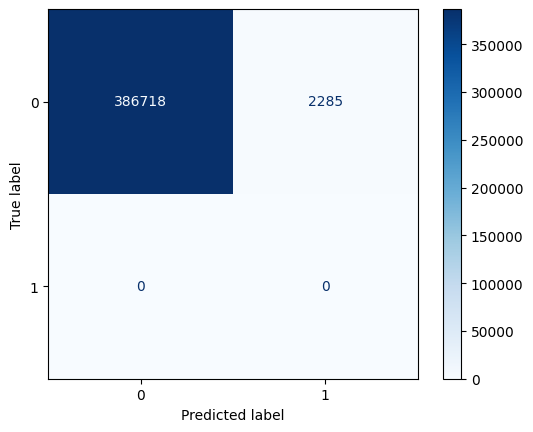

In [17]:
cm =confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
print(classification_report(y_pred,y_test))


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    389003
           1       0.00      0.00      0.00         0

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       1.00      0.99      1.00    389003



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
df_label_0 = df[df['is_fraud'] == 0]
df_label_1 = df[df['is_fraud'] == 1]

In [20]:
df_label_0 = df_label_0.sample(df_label_1.shape[0])

In [21]:
df_concat = pd.concat([df_label_0, df_label_1])


In [22]:
X_ = df_concat[['category', 'street', 'city', 'state', 'job', 'gender', 'hour', 'amt']]
y_ = df_concat['is_fraud']


In [23]:
_X_train, _X_test, _y_train, _y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier()
model.fit(_X_train, _y_train)

RandomForestClassifier()

In [25]:
model.score(_X_test, _y_test)

0.9713619713619713

In [26]:
model.score(X_test, y_test)


0.9703164242949284

In [27]:
y_pred = model.predict(X_test)

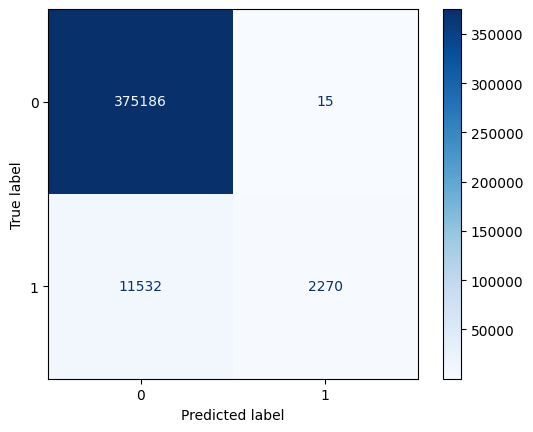

In [28]:
cm =confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [29]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    375201
           1       0.99      0.16      0.28     13802

    accuracy                           0.97    389003
   macro avg       0.98      0.58      0.63    389003
weighted avg       0.97      0.97      0.96    389003

